<a href="https://colab.research.google.com/github/Raunaq14/DLF_Assignment_2/blob/main/Deep_Learning_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using device: cuda
Files already downloaded and verified
Files already downloaded and verified


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)



Training ResNet18...
Epoch [1/10], Train Loss: 1.4578, Validation Loss: 1.1924, Validation Accuracy: 56.95%
Epoch [2/10], Train Loss: 0.9406, Validation Loss: 0.9866, Validation Accuracy: 65.51%
Epoch [3/10], Train Loss: 0.7241, Validation Loss: 0.7832, Validation Accuracy: 72.33%
Epoch [4/10], Train Loss: 0.5961, Validation Loss: 0.6150, Validation Accuracy: 78.34%
Epoch [5/10], Train Loss: 0.5097, Validation Loss: 0.5509, Validation Accuracy: 80.93%
Epoch [6/10], Train Loss: 0.4497, Validation Loss: 0.5407, Validation Accuracy: 81.47%
Epoch [7/10], Train Loss: 0.4012, Validation Loss: 0.4866, Validation Accuracy: 83.40%
Epoch [8/10], Train Loss: 0.3543, Validation Loss: 0.4912, Validation Accuracy: 83.50%
Epoch [9/10], Train Loss: 0.3108, Validation Loss: 0.4526, Validation Accuracy: 84.92%
Epoch [10/10], Train Loss: 0.2718, Validation Loss: 0.4646, Validation Accuracy: 84.78%


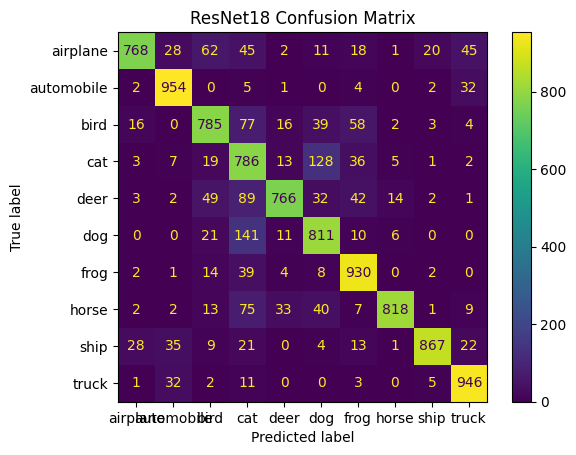


Training MobileNetV2...
Epoch [1/10], Train Loss: 1.4386, Validation Loss: 1.1358, Validation Accuracy: 58.93%
Epoch [2/10], Train Loss: 0.9620, Validation Loss: 0.9347, Validation Accuracy: 67.80%
Epoch [3/10], Train Loss: 0.7601, Validation Loss: 0.7720, Validation Accuracy: 72.78%
Epoch [4/10], Train Loss: 0.6283, Validation Loss: 0.5639, Validation Accuracy: 80.41%
Epoch [5/10], Train Loss: 0.5567, Validation Loss: 0.6014, Validation Accuracy: 79.52%
Epoch [6/10], Train Loss: 0.5044, Validation Loss: 0.5201, Validation Accuracy: 82.22%
Epoch [7/10], Train Loss: 0.4605, Validation Loss: 0.5276, Validation Accuracy: 82.16%
Epoch [8/10], Train Loss: 0.4156, Validation Loss: 0.4751, Validation Accuracy: 83.81%
Epoch [9/10], Train Loss: 0.3884, Validation Loss: 0.4750, Validation Accuracy: 83.97%
Epoch [10/10], Train Loss: 0.3599, Validation Loss: 0.4888, Validation Accuracy: 83.84%


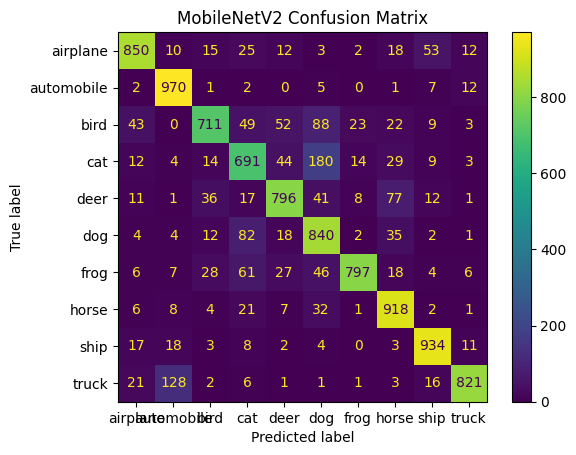


Training AlexNet...
Epoch [1/10], Train Loss: 1.7709, Validation Loss: 1.5201, Validation Accuracy: 43.85%
Epoch [2/10], Train Loss: 1.4398, Validation Loss: 1.3147, Validation Accuracy: 52.27%
Epoch [3/10], Train Loss: 1.3214, Validation Loss: 1.2190, Validation Accuracy: 56.60%
Epoch [4/10], Train Loss: 1.2381, Validation Loss: 1.1570, Validation Accuracy: 59.19%
Epoch [5/10], Train Loss: 1.1640, Validation Loss: 1.0428, Validation Accuracy: 63.29%
Epoch [6/10], Train Loss: 1.1214, Validation Loss: 1.0271, Validation Accuracy: 63.87%
Epoch [7/10], Train Loss: 1.0753, Validation Loss: 0.9805, Validation Accuracy: 65.50%
Epoch [8/10], Train Loss: 1.0402, Validation Loss: 0.9839, Validation Accuracy: 64.92%
Epoch [9/10], Train Loss: 1.0080, Validation Loss: 0.9286, Validation Accuracy: 66.99%
Epoch [10/10], Train Loss: 0.9828, Validation Loss: 0.9288, Validation Accuracy: 67.77%


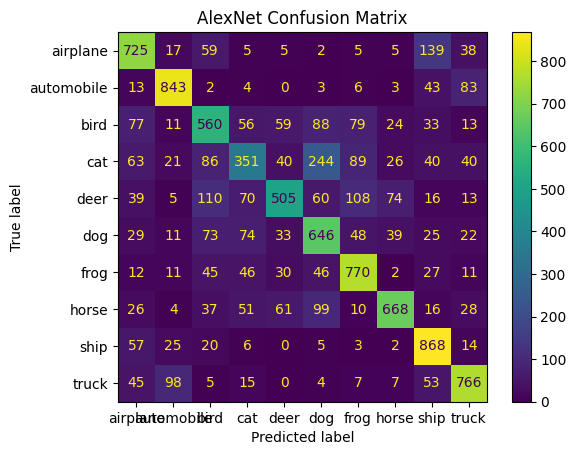

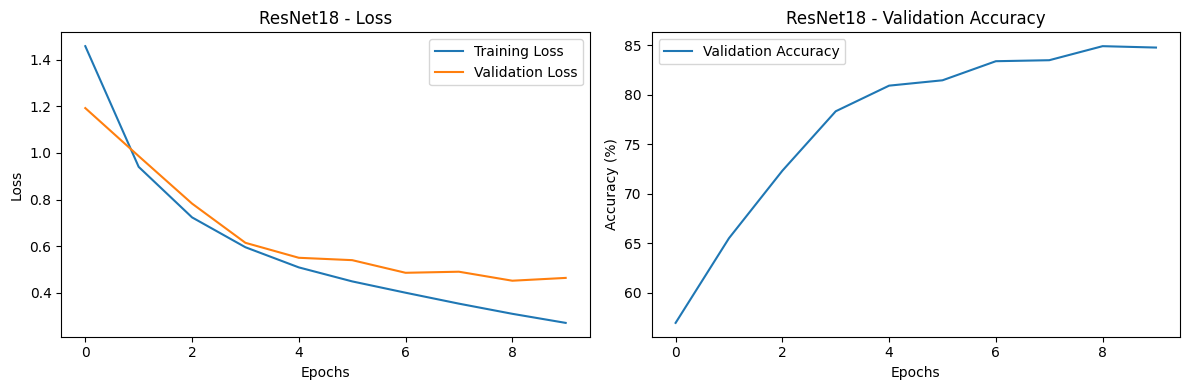

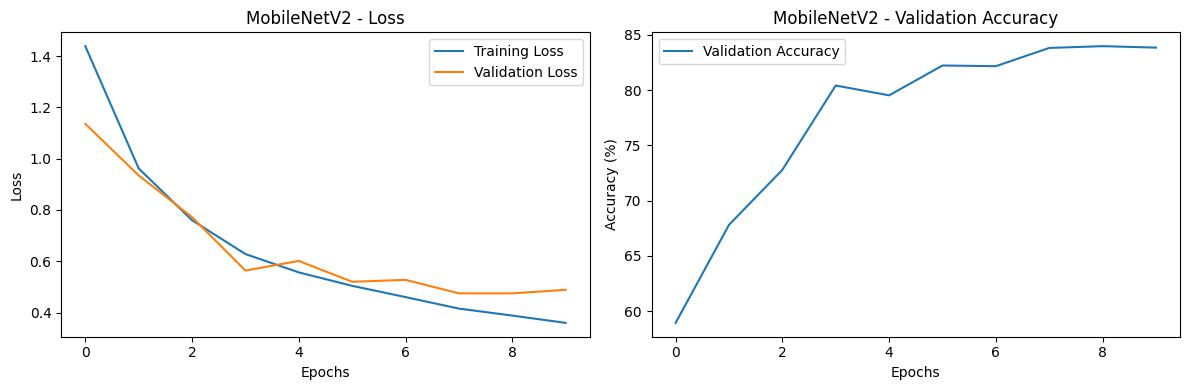

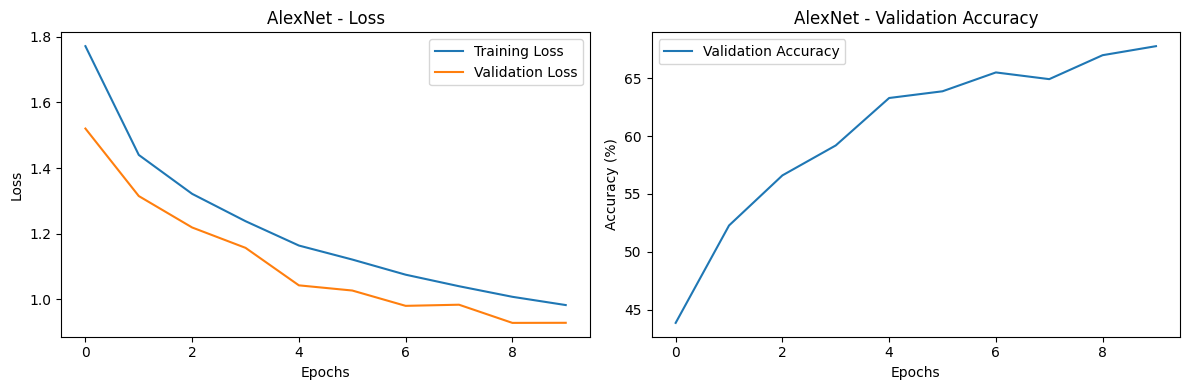

In [ ]:
# Import necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, random_split
from torchvision.models import resnet18, mobilenet_v2, alexnet
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Check if GPU is available and set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

# Modify data transformations for AlexNet to include resizing
transform = transforms.Compose([
    transforms.Resize(224),  # Resize images to 224x224
    transforms.RandomHorizontalFlip(),  # Augment data by flipping images horizontally
    transforms.RandomCrop(224, padding=4),  # Augment data by random cropping
    transforms.ToTensor(),  # Convert image to tensor
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize image with mean and std
])
# Load the CIFAR-10 dataset and split it into training, validation, and test sets
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

# Split training data into training (80%) and validation (20%) sets
train_size = int(0.8 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_dataset, val_dataset = random_split(train_dataset, [train_size, val_size])

# Create data loaders for training, validation, and test sets
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Function to train a model and collect metrics
def train_model(model, criterion, optimizer, num_epochs=10):
    train_losses, val_losses, val_accuracies = [], [], []
    model.to(device)

    for epoch in range(num_epochs):
        model.train()  # Set model to training mode
        running_loss = 0.0
        for i, (inputs, labels) in enumerate(train_loader):
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()  # Reset gradients
            outputs = model(inputs)
            loss = criterion(outputs, labels)  # Compute loss
            loss.backward()  # Backpropagate
            optimizer.step()  # Update weights

            running_loss += loss.item()

        # Calculate average training loss
        avg_train_loss = running_loss / len(train_loader)
        train_losses.append(avg_train_loss)

        # Validation phase
        model.eval()  # Set model to evaluation mode
        val_loss = 0.0
        correct = 0
        total = 0
        with torch.no_grad():  # No gradient computation during evaluation
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        # Calculate average validation loss and accuracy
        avg_val_loss = val_loss / len(val_loader)
        val_accuracy = 100 * correct / total
        val_losses.append(avg_val_loss)
        val_accuracies.append(val_accuracy)

        print(f'Epoch [{epoch + 1}/{num_epochs}], '
              f'Train Loss: {avg_train_loss:.4f}, '
              f'Validation Loss: {avg_val_loss:.4f}, '
              f'Validation Accuracy: {val_accuracy:.2f}%')

    return train_losses, val_losses, val_accuracies

# Function to plot the confusion matrix for a model
def plot_confusion_matrix(model, test_loader, model_name):
    model.eval()  # Set model to evaluation mode
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    # Generate the confusion matrix
    cm = confusion_matrix(all_labels, all_preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_dataset.classes)
    disp.plot(cmap='viridis')
    plt.title(f'{model_name} Confusion Matrix')
    plt.show()

# Define and train multiple models
models = {
    "ResNet18": resnet18(pretrained=False, num_classes=10),
    "MobileNetV2": mobilenet_v2(pretrained=False, num_classes=10),
    "AlexNet": alexnet(pretrained=False, num_classes=10)
}

model_metrics = {}

# Train and evaluate each model
for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    train_losses, val_losses, val_accuracies = train_model(model, criterion, optimizer)
    model_metrics[model_name] = {
        "train_losses": train_losses,
        "val_losses": val_losses,
        "val_accuracies": val_accuracies
    }
    # Plot the confusion matrix for each model
    plot_confusion_matrix(model, test_loader, model_name)

# Plot training and validation metrics
for model_name, metrics in model_metrics.items():
    plt.figure(figsize=(12, 4))

    # Training and validation loss plot
    plt.subplot(1, 2, 1)
    plt.plot(metrics['train_losses'], label='Training Loss')
    plt.plot(metrics['val_losses'], label='Validation Loss')
    plt.title(f'{model_name} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Validation accuracy plot
    plt.subplot(1, 2, 2)
    plt.plot(metrics['val_accuracies'], label='Validation Accuracy')
    plt.title(f'{model_name} - Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy (%)')
    plt.legend()

    plt.tight_layout()
    plt.show()